In [3]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

In [4]:
#Import data
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 784))
testX = testX.reshape((testX.shape[0],784))
trainX=trainX/255 # normalized pixel
trainX=trainX.T
testX=testX/255 # normalized pixel
testX=testX.T

n, m=trainX.shape
n, m

(784, 60000)

### Classical Neural Networks

In [5]:
def compute_loss(Y,A2): # a revoir 
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    return dZ2

In [6]:
#NN implementation
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    losses, accuracies = [], []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            loss = compute_loss(Y,A2)
            accuracy = get_accuracy(predictions, Y)
            losses.append(loss)
            accuracies.append(accuracy)
            print(accuracy)
    return W1, b1, W2, b2, losses, accuracies

W1, b1, W2, b2, losses_classical, accuracies_classical = gradient_descent(trainX, trainY, 0.10, 1000)

Iteration:  0
[9 9 9 ... 9 8 0] [5 0 4 ... 5 6 8]
0.06535
Iteration:  10
[2 8 0 ... 8 8 0] [5 0 4 ... 5 6 8]
0.15933333333333333
Iteration:  20
[7 0 0 ... 8 5 0] [5 0 4 ... 5 6 8]
0.23903333333333332



KeyboardInterrupt



## Line profiling

In [5]:
from line_profiler import LineProfiler

In [23]:
arg = {"X":trainX, "Y":trainY, "alpha":0.10, "iterations":1000}

lp_classical = LineProfiler()
lp_wrapper = lp_classical(gradient_descent)
lp_wrapper(**arg)

Iteration:  0
[1 1 4 ... 4 4 8] [5 0 4 ... 5 6 8]
0.08273333333333334
Iteration:  10
[1 1 4 ... 4 4 3] [5 0 4 ... 5 6 8]
0.16771666666666665
Iteration:  20
[3 3 4 ... 4 6 8] [5 0 4 ... 5 6 8]
0.22566666666666665
Iteration:  30
[1 0 4 ... 4 0 8] [5 0 4 ... 5 6 8]
0.2810166666666667
Iteration:  40
[1 0 4 ... 4 0 8] [5 0 4 ... 5 6 8]
0.3416666666666667
Iteration:  50
[1 0 4 ... 4 0 8] [5 0 4 ... 5 6 8]
0.40521666666666667
Iteration:  60
[1 0 4 ... 4 0 8] [5 0 4 ... 5 6 8]
0.46285
Iteration:  70
[1 0 4 ... 8 0 8] [5 0 4 ... 5 6 8]
0.5084166666666666
Iteration:  80
[1 0 4 ... 8 0 8] [5 0 4 ... 5 6 8]
0.54305
Iteration:  90
[3 0 4 ... 8 0 8] [5 0 4 ... 5 6 8]
0.5719333333333333
Iteration:  100
[3 0 4 ... 8 0 8] [5 0 4 ... 5 6 8]
0.5969333333333333
Iteration:  110
[3 0 4 ... 8 0 8] [5 0 4 ... 5 6 8]
0.6203166666666666
Iteration:  120
[3 0 4 ... 8 0 8] [5 0 4 ... 5 6 8]
0.6415833333333333
Iteration:  130
[3 0 4 ... 8 0 8] [5 0 4 ... 5 6 8]
0.6598166666666667
Iteration:  140
[3 0 4 ... 8 0 8] [

(array([[-0.01244819, -0.17742699,  0.24672195, ...,  0.11323177,
         -0.27733552,  0.13391748],
        [-0.30900234,  0.13869076,  0.1167821 , ..., -0.48106993,
         -0.39417844, -0.32361917],
        [-0.29849709,  0.20311723, -0.34020069, ..., -0.18785683,
          0.3591462 , -0.49432055],
        ...,
        [-0.17189489, -0.31451777,  0.00531855, ..., -0.36435241,
         -0.0264646 ,  0.30730172],
        [ 0.38588015, -0.31711004,  0.46929858, ...,  0.03497943,
         -0.1668723 ,  0.1199615 ],
        [ 0.28462578,  0.33571538,  0.41322229, ...,  0.22108508,
         -0.17389196, -0.41321529]]),
 array([[1.11065833],
        [0.63066621],
        [0.41031315],
        [0.87308489],
        [1.22565035],
        [1.19830138],
        [0.55101528],
        [0.40404259],
        [0.54494133],
        [1.31420467]]),
 array([[-0.23688793, -0.14676778, -0.07201782,  0.05706752,  0.68272207,
         -0.42390573, -0.11856764,  0.81524875, -0.23138855, -0.28828239],
  

In [27]:
lp_classical

Timer unit: 1e-07 s

Total time: 140.474 s
File: C:\Users\Hermes\AppData\Local\Temp\ipykernel_6428\4005128679.py
Function: gradient_descent at line 57

Line #      Hits         Time  Per Hit   % Time  Line Contents
    57                                           def gradient_descent(X, Y, alpha, iterations):
    58         1       2072.0   2072.0      0.0      W1, b1, W2, b2 = init_params()
    59         1         12.0     12.0      0.0      losses, accuracies = [], []
    60      1001      11853.0     11.8      0.0      for i in range(iterations):
    61      1000  760521424.0 760521.4     54.1          Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    62      1000  629602223.0 629602.2     44.8          dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    63      1000     649651.0    649.7      0.0          W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    64      1000      24857.0     24.9      0.0          if i % 10 == 0:
    65     

### Adam Optimizer

In [8]:
def init_params_with_adam():
    # Your existing initialization
    W1, b1, W2, b2 = init_params()

    # Adam specific initialization
    VdW1, SdW1 = np.zeros_like(W1), np.zeros_like(W1)
    Vdb1, Sdb1 = np.zeros_like(b1), np.zeros_like(b1)
    VdW2, SdW2 = np.zeros_like(W2), np.zeros_like(W2)
    Vdb2, Sdb2 = np.zeros_like(b2), np.zeros_like(b2)

    return W1, b1, W2, b2, VdW1, SdW1, Vdb1, Sdb1, VdW2, SdW2, Vdb2, Sdb2

def update_params_with_adam(W1, b1, W2, b2, dW1, db1, dW2, db2, VdW1, SdW1, Vdb1, Sdb1, VdW2, SdW2, Vdb2, Sdb2, t, alpha, beta1, beta2, epsilon):
    VdW1 = beta1 * VdW1 + (1 - beta1) * dW1
    Vdb1 = beta1 * Vdb1 + (1 - beta1) * db1
    VdW2 = beta1 * VdW2 + (1 - beta1) * dW2
    Vdb2 = beta1 * Vdb2 + (1 - beta1) * db2

    SdW1 = beta2 * SdW1 + (1 - beta2) * (dW1 ** 2)
    Sdb1 = beta2 * Sdb1 + (1 - beta2) * (db1 ** 2)
    SdW2 = beta2 * SdW2 + (1 - beta2) * (dW2 ** 2)
    Sdb2 = beta2 * Sdb2 + (1 - beta2) * (db2 ** 2)

    # Bias correction
    VdW1_corr = VdW1 / (1 - beta1 ** t)  #Etape 1 Adam réajustement des poids
    Vdb1_corr = Vdb1 / (1 - beta1 ** t)
    VdW2_corr = VdW2 / (1 - beta1 ** t)
    Vdb2_corr = Vdb2 / (1 - beta1 ** t)

    SdW1_corr = SdW1 / (1 - beta2 ** t)
    Sdb1_corr = Sdb1 / (1 - beta2 ** t)
    SdW2_corr = SdW2 /(1 - beta2 ** t)
    Sdb2_corr = Sdb2 / (1 - beta2 ** t)
    
    # Update parameters
    W1 = W1 - alpha * (VdW1_corr / (np.sqrt(SdW1_corr) + epsilon)) #Ici quer ce fait Adam étape 2 ajustement du gradient (elementwise)
    b1 = b1 - alpha * (Vdb1_corr / (np.sqrt(Sdb1_corr) + epsilon))
    W2 = W2 - alpha * (VdW2_corr / (np.sqrt(SdW2_corr) + epsilon))
    b2 = b2 - alpha * (Vdb2_corr / (np.sqrt(Sdb2_corr) + epsilon))

    #def update_gradient(g, m, v):
    #return (g - alpha_adam * m / (np.square(v) + epsilon)).T
    
    return W1, b1, W2, b2, VdW1, SdW1, Vdb1, Sdb1, VdW2, SdW2, Vdb2, Sdb2

In [9]:
def gradient_descent_with_adam(X, Y, alpha, iterations, beta1, beta2, epsilon):
    W1, b1, W2, b2, VdW1, SdW1, Vdb1, Sdb1, VdW2, SdW2, Vdb2, Sdb2 = init_params_with_adam()
    t = 0 # initializing the timestep
    losses_adam, accuracies_adam = [],[]
    for i in range(iterations):
        t += 1 # increment the timestep
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2, VdW1, SdW1, Vdb1, Sdb1, VdW2, SdW2, Vdb2, Sdb2 = update_params_with_adam(W1, b1, W2, b2, dW1, db1, dW2, db2, VdW1, SdW1, Vdb1, Sdb1, VdW2, SdW2, Vdb2, Sdb2, t, alpha, beta1, beta2, epsilon)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            loss=compute_loss(Y, A2)
            losses_adam.append(loss)
            accuracies_adam.append(accuracy)
    return W1, b1, W2, b2, losses_adam, accuracies_adam

In [40]:
W1, b1, W2, b2, losses_adam, accuracies_adam = gradient_descent_with_adam(trainX, trainY, 0.001, 1000, 0.9, 0.999, 1e-8)

Iteration:  0
[8 3 5 ... 8 9 8] [5 0 4 ... 5 6 8]
0.07996666666666667
Iteration:  10
[8 2 5 ... 8 9 8] [5 0 4 ... 5 6 8]
0.12066666666666667
Iteration:  20
[8 2 8 ... 8 6 8] [5 0 4 ... 5 6 8]
0.17006666666666667
Iteration:  30
[8 2 8 ... 8 6 8] [5 0 4 ... 5 6 8]
0.22461666666666666
Iteration:  40
[3 0 5 ... 8 6 8] [5 0 4 ... 5 6 8]
0.2975833333333333
Iteration:  50
[3 0 5 ... 5 6 8] [5 0 4 ... 5 6 8]
0.3861
Iteration:  60
[3 0 5 ... 5 6 8] [5 0 4 ... 5 6 8]
0.4676666666666667
Iteration:  70
[3 0 5 ... 5 6 8] [5 0 4 ... 5 6 8]
0.5305166666666666
Iteration:  80
[3 0 5 ... 5 6 8] [5 0 4 ... 5 6 8]
0.58085
Iteration:  90
[3 0 9 ... 5 6 8] [5 0 4 ... 5 6 8]
0.6208166666666667
Iteration:  100
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.6549
Iteration:  110
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.6857833333333333
Iteration:  120
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7127666666666667
Iteration:  130
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.73575
Iteration:  140
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.75531

In [83]:
arg_adam = {"X":trainX, "Y":trainY, "alpha":0.10, "iterations":1000, "beta1":0.9, "beta2":0.999, "epsilon":1e-8}

lp_adam = LineProfiler()
lp_wrapper = lp_adam(gradient_descent_with_adam)
lp_wrapper(**arg_adam)

NameError: name 'LineProfiler' is not defined

In [35]:
lp_adam.print_stats() 

Timer unit: 1e-07 s

Total time: 120.054 s
File: C:\Users\Hermes\AppData\Local\Temp\ipykernel_6428\174032212.py
Function: gradient_descent_with_adam at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def gradient_descent_with_adam(X, Y, alpha, iterations, beta1, beta2, epsilon):
     2         1       4840.0   4840.0      0.0      W1, b1, W2, b2, VdW1, SdW1, Vdb1, Sdb1, VdW2, SdW2, Vdb2, Sdb2 = init_params_with_adam()
     3         1          8.0      8.0      0.0      t = 0 # initializing the timestep
     4         1          8.0      8.0      0.0      losses_adam, accuracies_adam = [],[]
     5      1001      10688.0     10.7      0.0      for i in range(iterations):
     6      1000       9757.0      9.8      0.0          t += 1 # increment the timestep
     7      1000  649359256.0 649359.3     54.1          Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
     8      1000  537554245.0 537554.2     44.8      

### Graphics

In [45]:
import scienceplots

In [ ]:
plt.style.use(['science', 'ieee', 'notebook'])

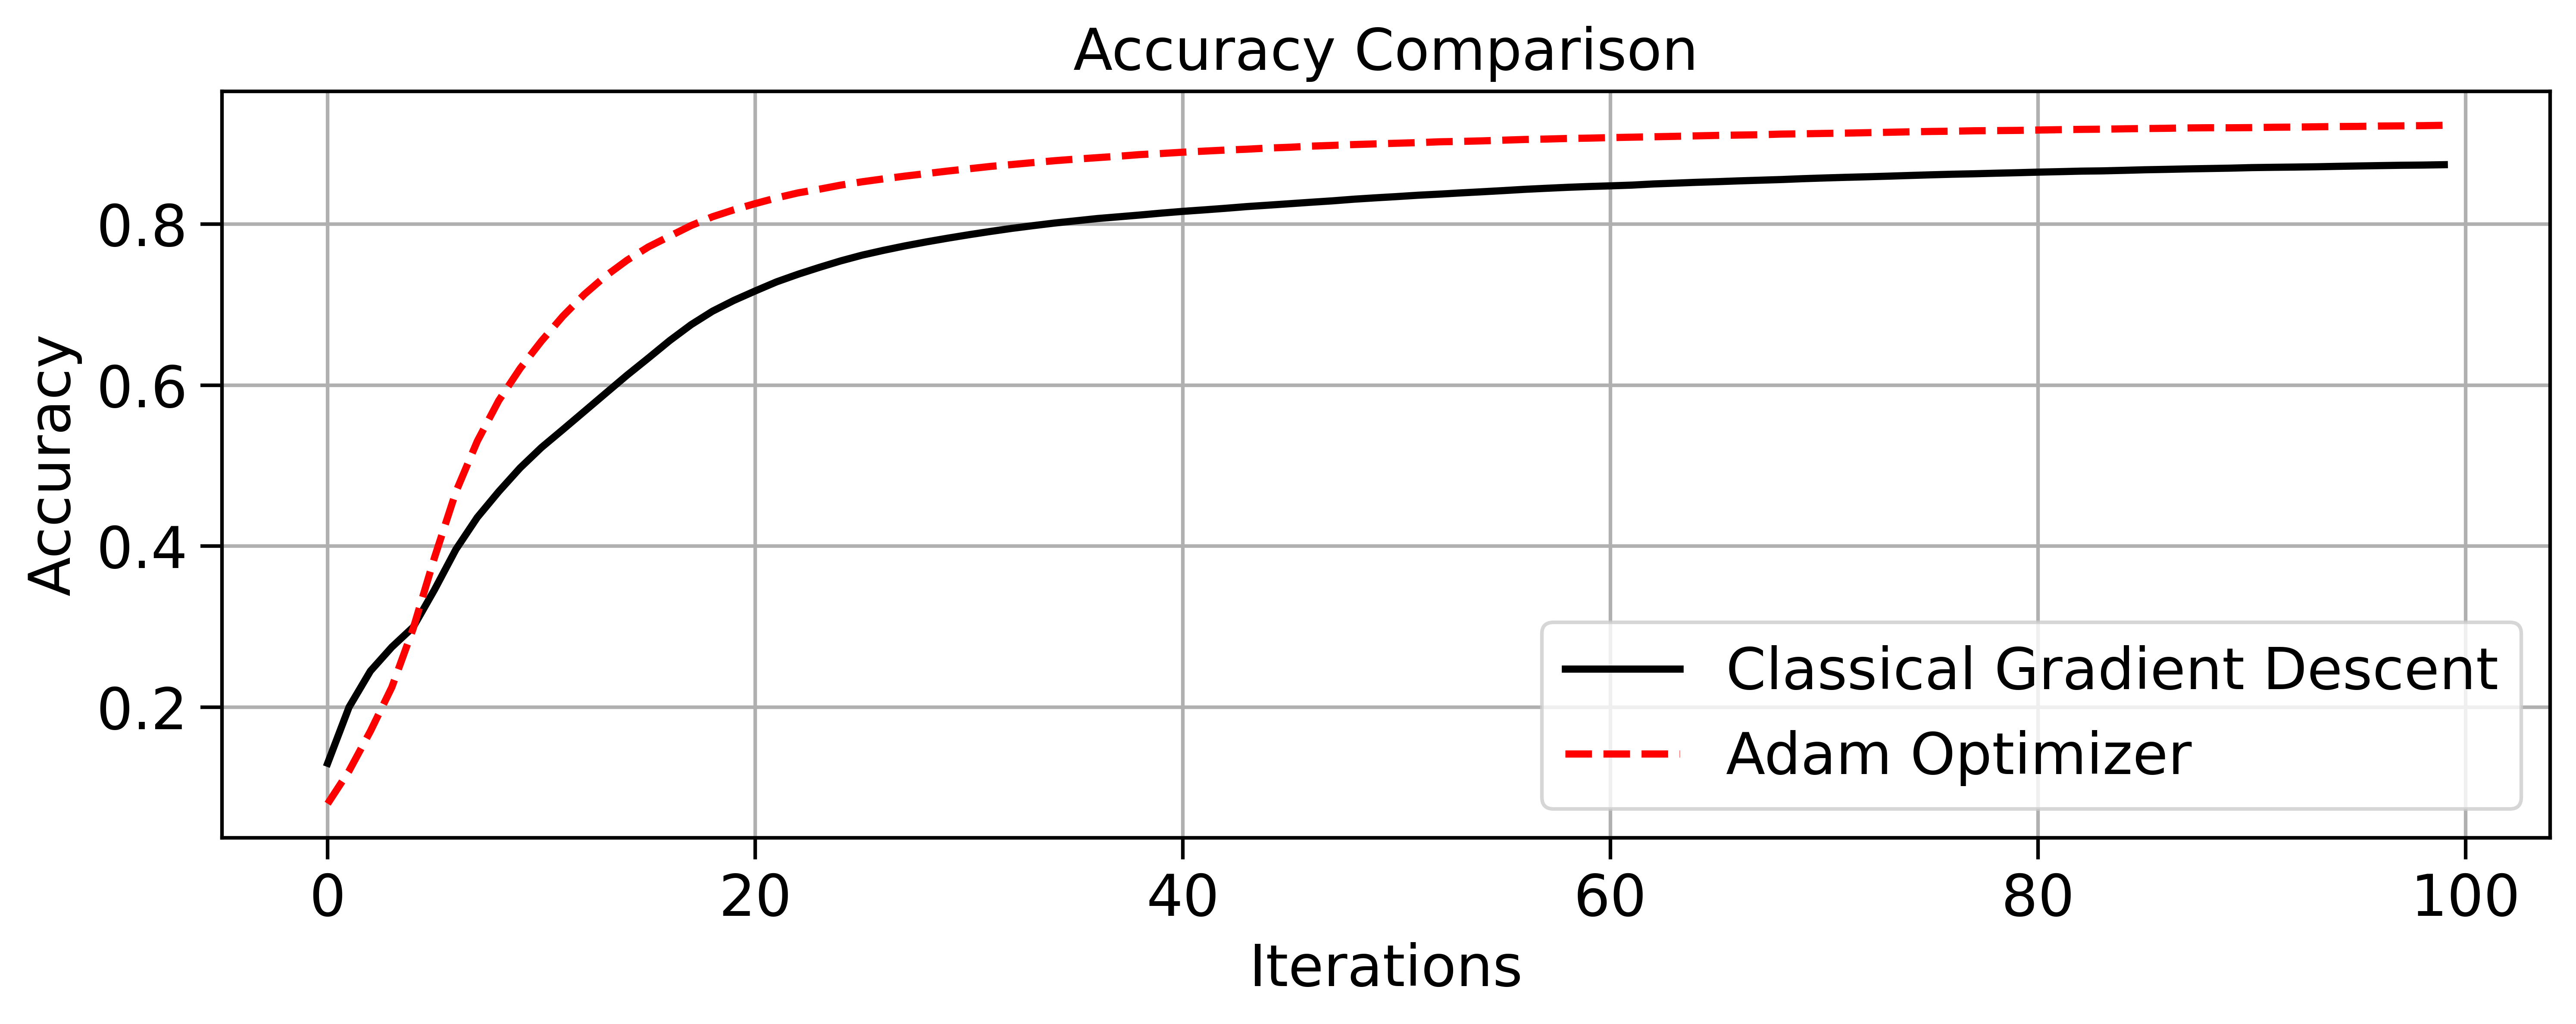

In [48]:
# Graph Accuracy

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)

ax.plot(accuracies_classical, label='Classical Gradient Descent')
ax.plot(accuracies_adam, label='Adam Optimizer')

plt.grid()

plt.title('Accuracy Comparison')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Hyperparameter exploration

In [10]:
# Define the beta1 and beta2 values
beta1s = [0.1, 0.9]
beta2s = [0.1, 0.999]

# Initialize lists to store results
all_accuracies = dict()
all_losses = dict()

for beta1 in beta1s:
    for beta2 in beta2s:
        
        W1, b1, W2, b2, losses_adam, accuracies_adam = gradient_descent_with_adam(trainX, trainY, 0.001, 1000, beta1, beta2, 1e-8)
        
        # Append accuracies and losses to the dicts
        all_accuracies[(beta1, beta2)] = accuracies_adam
        all_losses[(beta1, beta2)] = losses_adam


Iteration:  0
[9 0 2 ... 9 8 6] [5 0 4 ... 5 6 8]
0.12331666666666667
Iteration:  10
[0 0 2 ... 0 8 6] [5 0 4 ... 5 6 8]
0.13213333333333332
Iteration:  20
[0 0 2 ... 0 0 4] [5 0 4 ... 5 6 8]
0.15546666666666667
Iteration:  30
[0 0 2 ... 0 0 4] [5 0 4 ... 5 6 8]
0.18845
Iteration:  40
[0 0 2 ... 0 0 4] [5 0 4 ... 5 6 8]
0.23273333333333332
Iteration:  50
[0 0 2 ... 0 0 4] [5 0 4 ... 5 6 8]
0.3062166666666667
Iteration:  60
[0 0 2 ... 0 0 4] [5 0 4 ... 5 6 8]
0.38945
Iteration:  70
[0 0 2 ... 0 0 6] [5 0 4 ... 5 6 8]
0.472
Iteration:  80
[0 0 2 ... 0 0 6] [5 0 4 ... 5 6 8]
0.5455666666666666
Iteration:  90
[0 0 2 ... 0 0 6] [5 0 4 ... 5 6 8]
0.60215
Iteration:  100
[0 0 2 ... 0 0 6] [5 0 4 ... 5 6 8]
0.64225
Iteration:  110
[0 0 2 ... 0 6 6] [5 0 4 ... 5 6 8]
0.6764666666666667
Iteration:  120
[0 0 2 ... 5 6 6] [5 0 4 ... 5 6 8]
0.7039166666666666
Iteration:  130
[0 0 2 ... 5 6 6] [5 0 4 ... 5 6 8]
0.7308166666666667
Iteration:  140
[0 0 2 ... 5 6 6] [5 0 4 ... 5 6 8]
0.75565
Iteration:

Iteration:  240
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8215833333333333
Iteration:  250
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8275833333333333
Iteration:  260
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8328333333333333
Iteration:  270
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8383
Iteration:  280
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8432166666666666
Iteration:  290
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8471666666666666
Iteration:  300
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.85085
Iteration:  310
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8542333333333333
Iteration:  320
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8576166666666667
Iteration:  330
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8604166666666667
Iteration:  340
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8634
Iteration:  350
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8657833333333333
Iteration:  360
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8684333333333333
Iteration:  370
[3 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
0.8708166666666667
Iteration:  380
[3 0 9 ... 5 6 0] [5 0 4 

Iteration:  480
[8 0 7 ... 8 6 0] [5 0 4 ... 5 6 8]
0.57715
Iteration:  490
[8 0 7 ... 8 6 0] [5 0 4 ... 5 6 8]
0.5770166666666666
Iteration:  500
[8 0 7 ... 8 6 0] [5 0 4 ... 5 6 8]
0.5827833333333333
Iteration:  510
[8 0 7 ... 8 6 0] [5 0 4 ... 5 6 8]
0.5886
Iteration:  520
[8 0 7 ... 8 6 0] [5 0 4 ... 5 6 8]
0.5944833333333334
Iteration:  530
[8 0 7 ... 8 6 0] [5 0 4 ... 5 6 8]
0.5993833333333334
Iteration:  540
[8 0 7 ... 5 6 0] [5 0 4 ... 5 6 8]
0.6004666666666667
Iteration:  550
[8 0 7 ... 8 6 0] [5 0 4 ... 5 6 8]
0.6032666666666666
Iteration:  560
[8 0 7 ... 8 6 0] [5 0 4 ... 5 6 8]
0.6098833333333333
Iteration:  570
[8 0 7 ... 5 6 0] [5 0 4 ... 5 6 8]
0.6108
Iteration:  580
[8 0 7 ... 8 6 0] [5 0 4 ... 5 6 8]
0.6142
Iteration:  590
[8 0 7 ... 5 6 0] [5 0 4 ... 5 6 8]
0.6182833333333333
Iteration:  600
[8 0 7 ... 5 6 0] [5 0 4 ... 5 6 8]
0.6198
Iteration:  610
[8 0 7 ... 5 6 0] [5 0 4 ... 5 6 8]
0.6203
Iteration:  620
[0 0 7 ... 5 6 0] [5 0 4 ... 5 6 8]
0.62285
Iteration:  630
[

Iteration:  710
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9046166666666666
Iteration:  720
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9050333333333334
Iteration:  730
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9056333333333333
Iteration:  740
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9062833333333333
Iteration:  750
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9068333333333334
Iteration:  760
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9075666666666666
Iteration:  770
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.908
Iteration:  780
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.90855
Iteration:  790
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.90925
Iteration:  800
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.90985
Iteration:  810
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9103833333333333
Iteration:  820
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9109333333333334
Iteration:  830
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9115666666666666
Iteration:  840
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.912
Iteration:  850
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.91263333333

In [12]:
import scienceplots
import itertools

In [13]:
plt.style.use(["ieee", "nature", "notebook", "no-latex"])

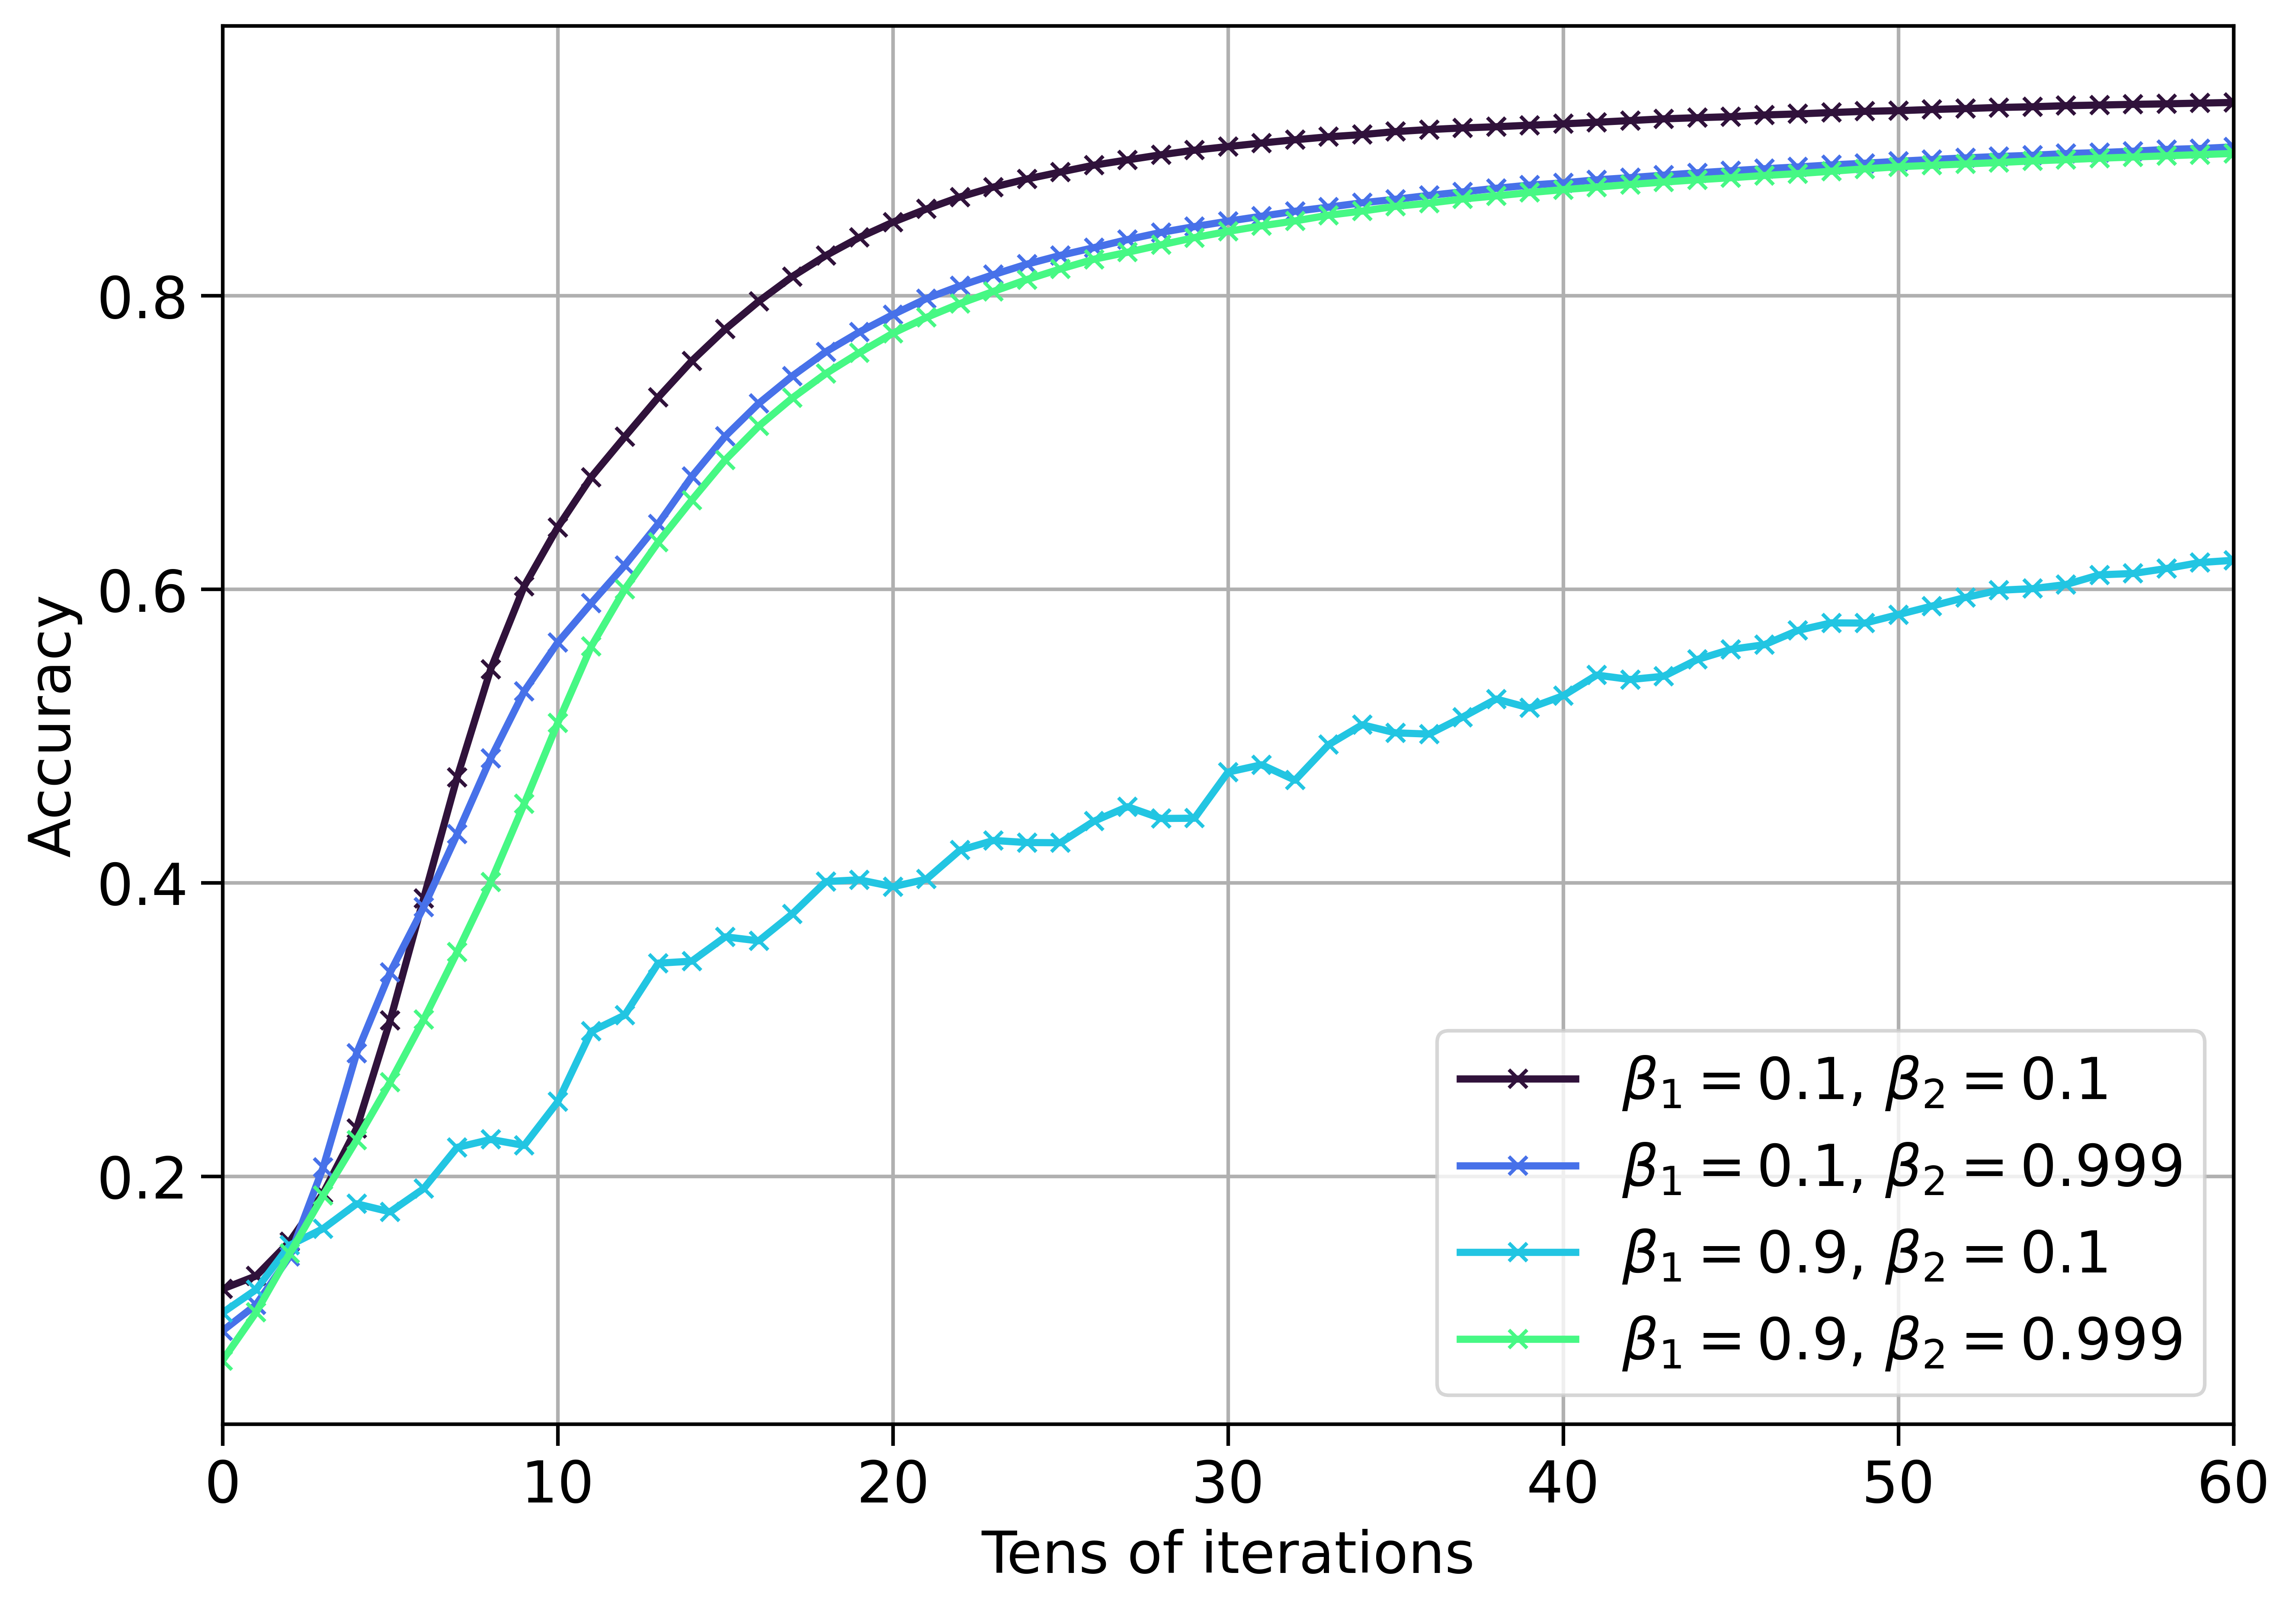

In [14]:
# Plot accuracies for each combination
plt.figure(figsize=(10, 7))
colors = plt.cm.turbo(np.linspace(0,0.4,len(beta1s)*len(beta2s)))
i = 0

for (beta1, beta2) in itertools.product(beta1s, beta2s):
    plt.plot(all_accuracies[(beta1, beta2)], label=rf'$\beta_1={beta1}$, $\beta_2={beta2}$', linestyle="-", marker="x", markersize=5, color=colors[i])
    i+=1
    
plt.xlabel('Tens of iterations')
plt.ylabel('Accuracy')
plt.xlim(0, 60)
plt.title('')
plt.legend()
plt.grid(True)
plt.show()

### 5-fold Cross-validation

In [17]:
from tqdm.notebook import tqdm

In [19]:
from sklearn.model_selection import KFold
import numpy as np

# Define the beta1 and beta2 values
beta1s = [0.1, 0.9]
beta2s = [0.1, 0.999]

# Number of folds
n_folds = 5

# Initialize dictionary to store results
results = dict()

# Create KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

for beta1 in tqdm(beta1s, leave=True):
    for beta2 in tqdm(beta2s, leave=False):
        fold_accuracies = []
        fold_losses = []

        for train_index, val_index in kf.split(trainX.T):
            # Splitting data into training and validation for the current fold
            X_train, X_val = trainX[:, train_index], trainX[:, val_index]
            Y_train, Y_val = trainY[train_index], trainY[val_index]

            # Train the model
            W1, b1, W2, b2, losses_adam, accuracies_adam = gradient_descent_with_adam(
                X_train, Y_train, 0.001, 1000, beta1, beta2, 1e-8
            )
            
            # Evaluate the model on the validation set
            # Assuming you have a function evaluate_model(W1, b1, W2, b2, X_val, Y_val)
#             val_accuracy = evaluate_model(W1, b1, W2, b2, X_val, Y_val)

            fold_accuracies.append(accuracies_adam)
#             fold_losses.append(losses_adam)

        # Store the results for each beta1, beta2 combination
        results[(beta1, beta2)] = {'accuracies': fold_accuracies}


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Iteration:  0
[9 9 0 ... 6 9 0] [5 0 4 ... 3 5 6]
0.1191875
Iteration:  10
[8 9 2 ... 6 9 2] [5 0 4 ... 3 5 6]
0.12325
Iteration:  20
[8 9 2 ... 6 5 2] [5 0 4 ... 3 5 6]
0.124375
Iteration:  30
[8 9 2 ... 6 8 2] [5 0 4 ... 3 5 6]
0.14352083333333332
Iteration:  40
[8 9 2 ... 9 8 7] [5 0 4 ... 3 5 6]
0.19572916666666668
Iteration:  50
[8 0 2 ... 9 8 6] [5 0 4 ... 3 5 6]
0.2567291666666667
Iteration:  60
[8 0 2 ... 0 8 6] [5 0 4 ... 3 5 6]
0.3160625
Iteration:  70
[8 0 2 ... 0 8 6] [5 0 4 ... 3 5 6]
0.38247916666666665
Iteration:  80
[8 0 2 ... 3 8 6] [5 0 4 ... 3 5 6]
0.4545
Iteration:  90
[8 0 2 ... 3 8 6] [5 0 4 ... 3 5 6]
0.5199583333333333
Iteration:  100
[8 0 2 ... 3 8 6] [5 0 4 ... 3 5 6]
0.573375
Iteration:  110
[8 0 2 ... 3 8 6] [5 0 4 ... 3 5 6]
0.6207083333333333
Iteration:  120
[8 0 2 ... 3 8 6] [5 0 4 ... 3 5 6]
0.664625
Iteration:  130
[3 0 4 ... 3 8 6] [5 0 4 ... 3 5 6]
0.6985416666666666
Iteration:  140
[3 0 4 ... 3 8 6] [5 0 4 ... 3 5 6]
0.7257916666666666
Iteration:  15

Iteration:  220
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.8433125
Iteration:  230
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.8523958333333334
Iteration:  240
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.86
Iteration:  250
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.8675416666666667
Iteration:  260
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.8737291666666667
Iteration:  270
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.8785625
Iteration:  280
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.88375
Iteration:  290
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.8882916666666667
Iteration:  300
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.8922916666666667
Iteration:  310
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.8961666666666667
Iteration:  320
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.8997708333333333
Iteration:  330
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.9026875
Iteration:  340
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.9054791666666666
Iteration:  350
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.9079583333333333
Iteration:  360
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.9101

Iteration:  450
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.9114375
Iteration:  460
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.9127708333333333
Iteration:  470
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.9138541666666666
Iteration:  480
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.9148958333333334
Iteration:  490
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.9159583333333333
Iteration:  500
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.9168333333333333
Iteration:  510
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.917625
Iteration:  520
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.91875
Iteration:  530
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.919625
Iteration:  540
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.9201458333333333
Iteration:  550
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.9207708333333333
Iteration:  560
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.9215416666666667
Iteration:  570
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.9218958333333334
Iteration:  580
[5 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.9225208333333333
Iteration:  590
[5 0 4 ... 8 3 8] [5 0 4 ... 8

Iteration:  670
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9342708333333334
Iteration:  680
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.934625
Iteration:  690
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9348958333333334
Iteration:  700
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9351666666666667
Iteration:  710
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9357291666666666
Iteration:  720
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.936
Iteration:  730
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9364166666666667
Iteration:  740
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.936625
Iteration:  750
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9369791666666667
Iteration:  760
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9374375
Iteration:  770
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9381666666666667
Iteration:  780
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.938375
Iteration:  790
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9386458333333333
Iteration:  800
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9389791666666667
Iteration:  810
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9392

Iteration:  900
[5 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9372083333333333
Iteration:  910
[5 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9374375
Iteration:  920
[5 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9375416666666667
Iteration:  930
[5 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9376666666666666
Iteration:  940
[5 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9377291666666666
Iteration:  950
[5 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9380625
Iteration:  960
[5 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9382916666666666
Iteration:  970
[5 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9386458333333333
Iteration:  980
[5 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9386666666666666
Iteration:  990
[5 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9387916666666667
Iteration:  0
[7 7 5 ... 7 7 4] [5 0 4 ... 3 5 6]
0.1439375
Iteration:  10
[7 7 5 ... 0 7 4] [5 0 4 ... 3 5 6]
0.15710416666666666
Iteration:  20
[7 0 5 ... 0 7 4] [5 0 4 ... 3 5 6]
0.19120833333333334
Iteration:  30
[7 0 5 ... 0 7 4] [5 0 4 ... 3 5 6]
0.22577083333333334
Iteration:  40
[7 0 5 ... 0 8 4] [5

Iteration:  110
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.5549791666666667
Iteration:  120
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.5903958333333333
Iteration:  130
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.622
Iteration:  140
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.6525208333333333
Iteration:  150
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.6776666666666666
Iteration:  160
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.700125
Iteration:  170
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.72
Iteration:  180
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.7386458333333333
Iteration:  190
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.7554583333333333
Iteration:  200
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.7699583333333333
Iteration:  210
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.7831041666666667
Iteration:  220
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.7950208333333333
Iteration:  230
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.80475
Iteration:  240
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.8128333333333333
Iteration:  250
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.

Iteration:  320
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8645625
Iteration:  330
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.867125
Iteration:  340
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8697916666666666
Iteration:  350
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8721041666666667
Iteration:  360
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8738125
Iteration:  370
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8755416666666667
Iteration:  380
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8774791666666667
Iteration:  390
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8789791666666666
Iteration:  400
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8806666666666667
Iteration:  410
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8825833333333334
Iteration:  420
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8840416666666666
Iteration:  430
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8854791666666667
Iteration:  440
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8868958333333333
Iteration:  450
[3 0 4 ... 8 3 8] [5 0 4 ... 8 3 8]
0.8881458333333333
Iteration:  460
[3 0 4 ... 8 3 8] 

Iteration:  530
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.8938333333333334
Iteration:  540
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.8948541666666666
Iteration:  550
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.8962291666666666
Iteration:  560
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.8974166666666666
Iteration:  570
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.8985416666666667
Iteration:  580
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.8995416666666667
Iteration:  590
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9003333333333333
Iteration:  600
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9014375
Iteration:  610
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9022083333333333
Iteration:  620
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9029375
Iteration:  630
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9035208333333333
Iteration:  640
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.90425
Iteration:  650
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9049583333333333
Iteration:  660
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.9054791666666666
Iteration:  670
[5 0 4 ... 5 6 8] [

Iteration:  740
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9091875
Iteration:  750
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9098333333333334
Iteration:  760
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.910125
Iteration:  770
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9104375
Iteration:  780
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9109791666666667
Iteration:  790
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9112708333333334
Iteration:  800
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9119375
Iteration:  810
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9122708333333334
Iteration:  820
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9126458333333334
Iteration:  830
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9130416666666666
Iteration:  840
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9132708333333334
Iteration:  850
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9139375
Iteration:  860
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.91425
Iteration:  870
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9145
Iteration:  880
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.9150208333333333
Iter

  0%|          | 0/2 [00:00<?, ?it/s]

Iteration:  0
[2 5 4 ... 5 9 5] [5 0 4 ... 3 5 6]
0.07689583333333333
Iteration:  10
[2 5 4 ... 5 9 5] [5 0 4 ... 3 5 6]
0.09220833333333334
Iteration:  20
[2 5 4 ... 5 2 8] [5 0 4 ... 3 5 6]
0.122625
Iteration:  30
[2 2 4 ... 2 2 2] [5 0 4 ... 3 5 6]
0.13291666666666666
Iteration:  40
[2 2 2 ... 3 2 2] [5 0 4 ... 3 5 6]
0.12952083333333334
Iteration:  50
[2 2 2 ... 3 2 2] [5 0 4 ... 3 5 6]
0.12535416666666666
Iteration:  60
[3 2 2 ... 3 2 2] [5 0 4 ... 3 5 6]
0.12127083333333333
Iteration:  70
[3 2 2 ... 3 2 2] [5 0 4 ... 3 5 6]
0.12985416666666666
Iteration:  80
[2 2 2 ... 3 2 2] [5 0 4 ... 3 5 6]
0.15575
Iteration:  90
[2 2 2 ... 3 2 2] [5 0 4 ... 3 5 6]
0.16885416666666667
Iteration:  100
[3 2 2 ... 3 2 2] [5 0 4 ... 3 5 6]
0.17366666666666666
Iteration:  110
[3 2 2 ... 3 2 2] [5 0 4 ... 3 5 6]
0.19252083333333334
Iteration:  120
[2 2 4 ... 3 2 2] [5 0 4 ... 3 5 6]
0.23447916666666666
Iteration:  130
[2 2 4 ... 3 2 2] [5 0 4 ... 3 5 6]
0.2522916666666667
Iteration:  140
[3 2 4 ... 

Iteration:  190
[9 7 9 ... 0 6 9] [4 1 9 ... 5 6 8]
0.4220625
Iteration:  200
[9 7 9 ... 0 6 9] [4 1 9 ... 5 6 8]
0.4338125
Iteration:  210
[9 7 9 ... 0 6 9] [4 1 9 ... 5 6 8]
0.45016666666666666
Iteration:  220
[9 7 9 ... 0 6 9] [4 1 9 ... 5 6 8]
0.44985416666666667
Iteration:  230
[9 7 9 ... 0 6 5] [4 1 9 ... 5 6 8]
0.447125
Iteration:  240
[9 7 9 ... 0 6 5] [4 1 9 ... 5 6 8]
0.45366666666666666
Iteration:  250
[9 7 9 ... 0 6 9] [4 1 9 ... 5 6 8]
0.4688333333333333
Iteration:  260
[9 7 9 ... 0 6 9] [4 1 9 ... 5 6 8]
0.46960416666666666
Iteration:  270
[9 7 9 ... 0 6 5] [4 1 9 ... 5 6 8]
0.46658333333333335
Iteration:  280
[9 7 9 ... 0 6 5] [4 1 9 ... 5 6 8]
0.4724791666666667
Iteration:  290
[9 7 9 ... 0 6 9] [4 1 9 ... 5 6 8]
0.48591666666666666
Iteration:  300
[9 7 9 ... 0 6 9] [4 1 9 ... 5 6 8]
0.48560416666666667
Iteration:  310
[9 7 9 ... 0 6 5] [4 1 9 ... 5 6 8]
0.4845
Iteration:  320
[9 7 9 ... 0 6 5] [4 1 9 ... 5 6 8]
0.490625
Iteration:  330
[9 7 9 ... 0 6 9] [4 1 9 ... 5 6 

C:\Users\Hermes\AppData\Local\Temp\ipykernel_4040\2082559469.py:13: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
C:\Users\Hermes\AppData\Local\Temp\ipykernel_4040\2082559469.py:13: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / sum(np.exp(Z))


Iteration:  40
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  50
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  60
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  70
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  80
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  90
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  100
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  110
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  120
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  130
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  140
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  150
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  160
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  170
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  180
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  190
[0 0 0 ... 0 0 0] [5 0 4 ... 8 3 8]
0.0985625
Iteration:  20

Iteration:  330
[5 0 9 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7312708333333333
Iteration:  340
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7341875
Iteration:  350
[5 0 9 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7399375
Iteration:  360
[5 0 9 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7502083333333334
Iteration:  370
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7529791666666666
Iteration:  380
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7552708333333333
Iteration:  390
[5 0 9 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7618333333333334
Iteration:  400
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7650416666666666
Iteration:  410
[5 0 9 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7656458333333334
Iteration:  420
[5 0 9 ... 5 6 8] [5 0 4 ... 5 6 8]
0.772875
Iteration:  430
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7768958333333333
Iteration:  440
[5 0 9 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7758125
Iteration:  450
[5 0 9 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7805833333333333
Iteration:  460
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7847083333333333
Iteration:  470
[5 0 9 ... 5 6 8] [5 0 4 ..

Iteration:  540
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8491458333333334
Iteration:  550
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8506875
Iteration:  560
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8523333333333334
Iteration:  570
[3 0 1 ... 5 6 5] [5 0 1 ... 5 6 8]
0.853875
Iteration:  580
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8556458333333333
Iteration:  590
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8572708333333333
Iteration:  600
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8580416666666667
Iteration:  610
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8615833333333334
Iteration:  620
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8611041666666667
Iteration:  630
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8640208333333333
Iteration:  640
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8637708333333334
Iteration:  650
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8654791666666667
Iteration:  660
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8667291666666667
Iteration:  670
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8664583333333333
Iteration:  680
[3 0 1 ..

Iteration:  760
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9016458333333334
Iteration:  770
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9020208333333334
Iteration:  780
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9023541666666667
Iteration:  790
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9029166666666667
Iteration:  800
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9035416666666667
Iteration:  810
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9041875
Iteration:  820
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9049791666666667
Iteration:  830
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9053958333333333
Iteration:  840
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9060625
Iteration:  850
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9064583333333334
Iteration:  860
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.907
Iteration:  870
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9075625
Iteration:  880
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9078958333333333
Iteration:  890
[5 0 4 ... 3 5 6] [5 0 4 ... 3 5 6]
0.9084583333333334
Iteration:  900
[5 0 4 ... 3 5 6] [5 0 4 ... 3

Iteration:  970
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.9081041666666667
Iteration:  980
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.9083125
Iteration:  990
[4 1 9 ... 5 6 8] [4 1 9 ... 5 6 8]
0.9087083333333333
Iteration:  0
[3 3 7 ... 3 3 3] [5 0 4 ... 8 3 8]
0.1204375
Iteration:  10
[3 7 7 ... 3 3 3] [5 0 4 ... 8 3 8]
0.13045833333333334
Iteration:  20
[3 7 7 ... 0 3 3] [5 0 4 ... 8 3 8]
0.1565625
Iteration:  30
[3 0 7 ... 0 3 3] [5 0 4 ... 8 3 8]
0.19516666666666665
Iteration:  40
[3 0 7 ... 0 0 3] [5 0 4 ... 8 3 8]
0.23989583333333334
Iteration:  50
[3 0 7 ... 0 0 3] [5 0 4 ... 8 3 8]
0.28889583333333335
Iteration:  60
[7 0 7 ... 0 3 0] [5 0 4 ... 8 3 8]
0.33891666666666664
Iteration:  70
[7 0 7 ... 0 3 0] [5 0 4 ... 8 3 8]
0.38314583333333335
Iteration:  80
[5 0 7 ... 3 3 0] [5 0 4 ... 8 3 8]
0.42189583333333336
Iteration:  90
[5 0 7 ... 3 3 3] [5 0 4 ... 8 3 8]
0.4566458333333333
Iteration:  100
[5 0 7 ... 3 3 3] [5 0 4 ... 8 3 8]
0.4882916666666667
Iteration:  110
[5 0 7 ... 3 3 3] [5 

Iteration:  180
[3 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
0.7910833333333334
Iteration:  190
[3 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
0.7992291666666667
Iteration:  200
[3 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
0.8066875
Iteration:  210
[3 0 7 ... 5 6 5] [5 0 4 ... 5 6 8]
0.8141458333333333
Iteration:  220
[3 0 7 ... 5 6 5] [5 0 4 ... 5 6 8]
0.8210833333333334
Iteration:  230
[3 0 7 ... 5 6 5] [5 0 4 ... 5 6 8]
0.8268333333333333
Iteration:  240
[3 0 7 ... 5 6 5] [5 0 4 ... 5 6 8]
0.8326041666666667
Iteration:  250
[3 0 7 ... 5 6 5] [5 0 4 ... 5 6 8]
0.8374583333333333
Iteration:  260
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.8418541666666667
Iteration:  270
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.8465833333333334
Iteration:  280
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.8503958333333334
Iteration:  290
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.8539791666666666
Iteration:  300
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.8577916666666666
Iteration:  310
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.8607083333333333
Iteration:  320

Iteration:  380
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8565208333333333
Iteration:  390
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.85975
Iteration:  400
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8619583333333334
Iteration:  410
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8648333333333333
Iteration:  420
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.86675
Iteration:  430
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8693333333333333
Iteration:  440
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8712708333333333
Iteration:  450
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8729375
Iteration:  460
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8747291666666667
Iteration:  470
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8766666666666667
Iteration:  480
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8783541666666667
Iteration:  490
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8799166666666667
Iteration:  500
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8811666666666667
Iteration:  510
[3 0 1 ... 5 6 8] [5 0 1 ... 5 6 8]
0.8824791666666667
Iteration:  520
[3 0 1 ... 5 6 8] [5 

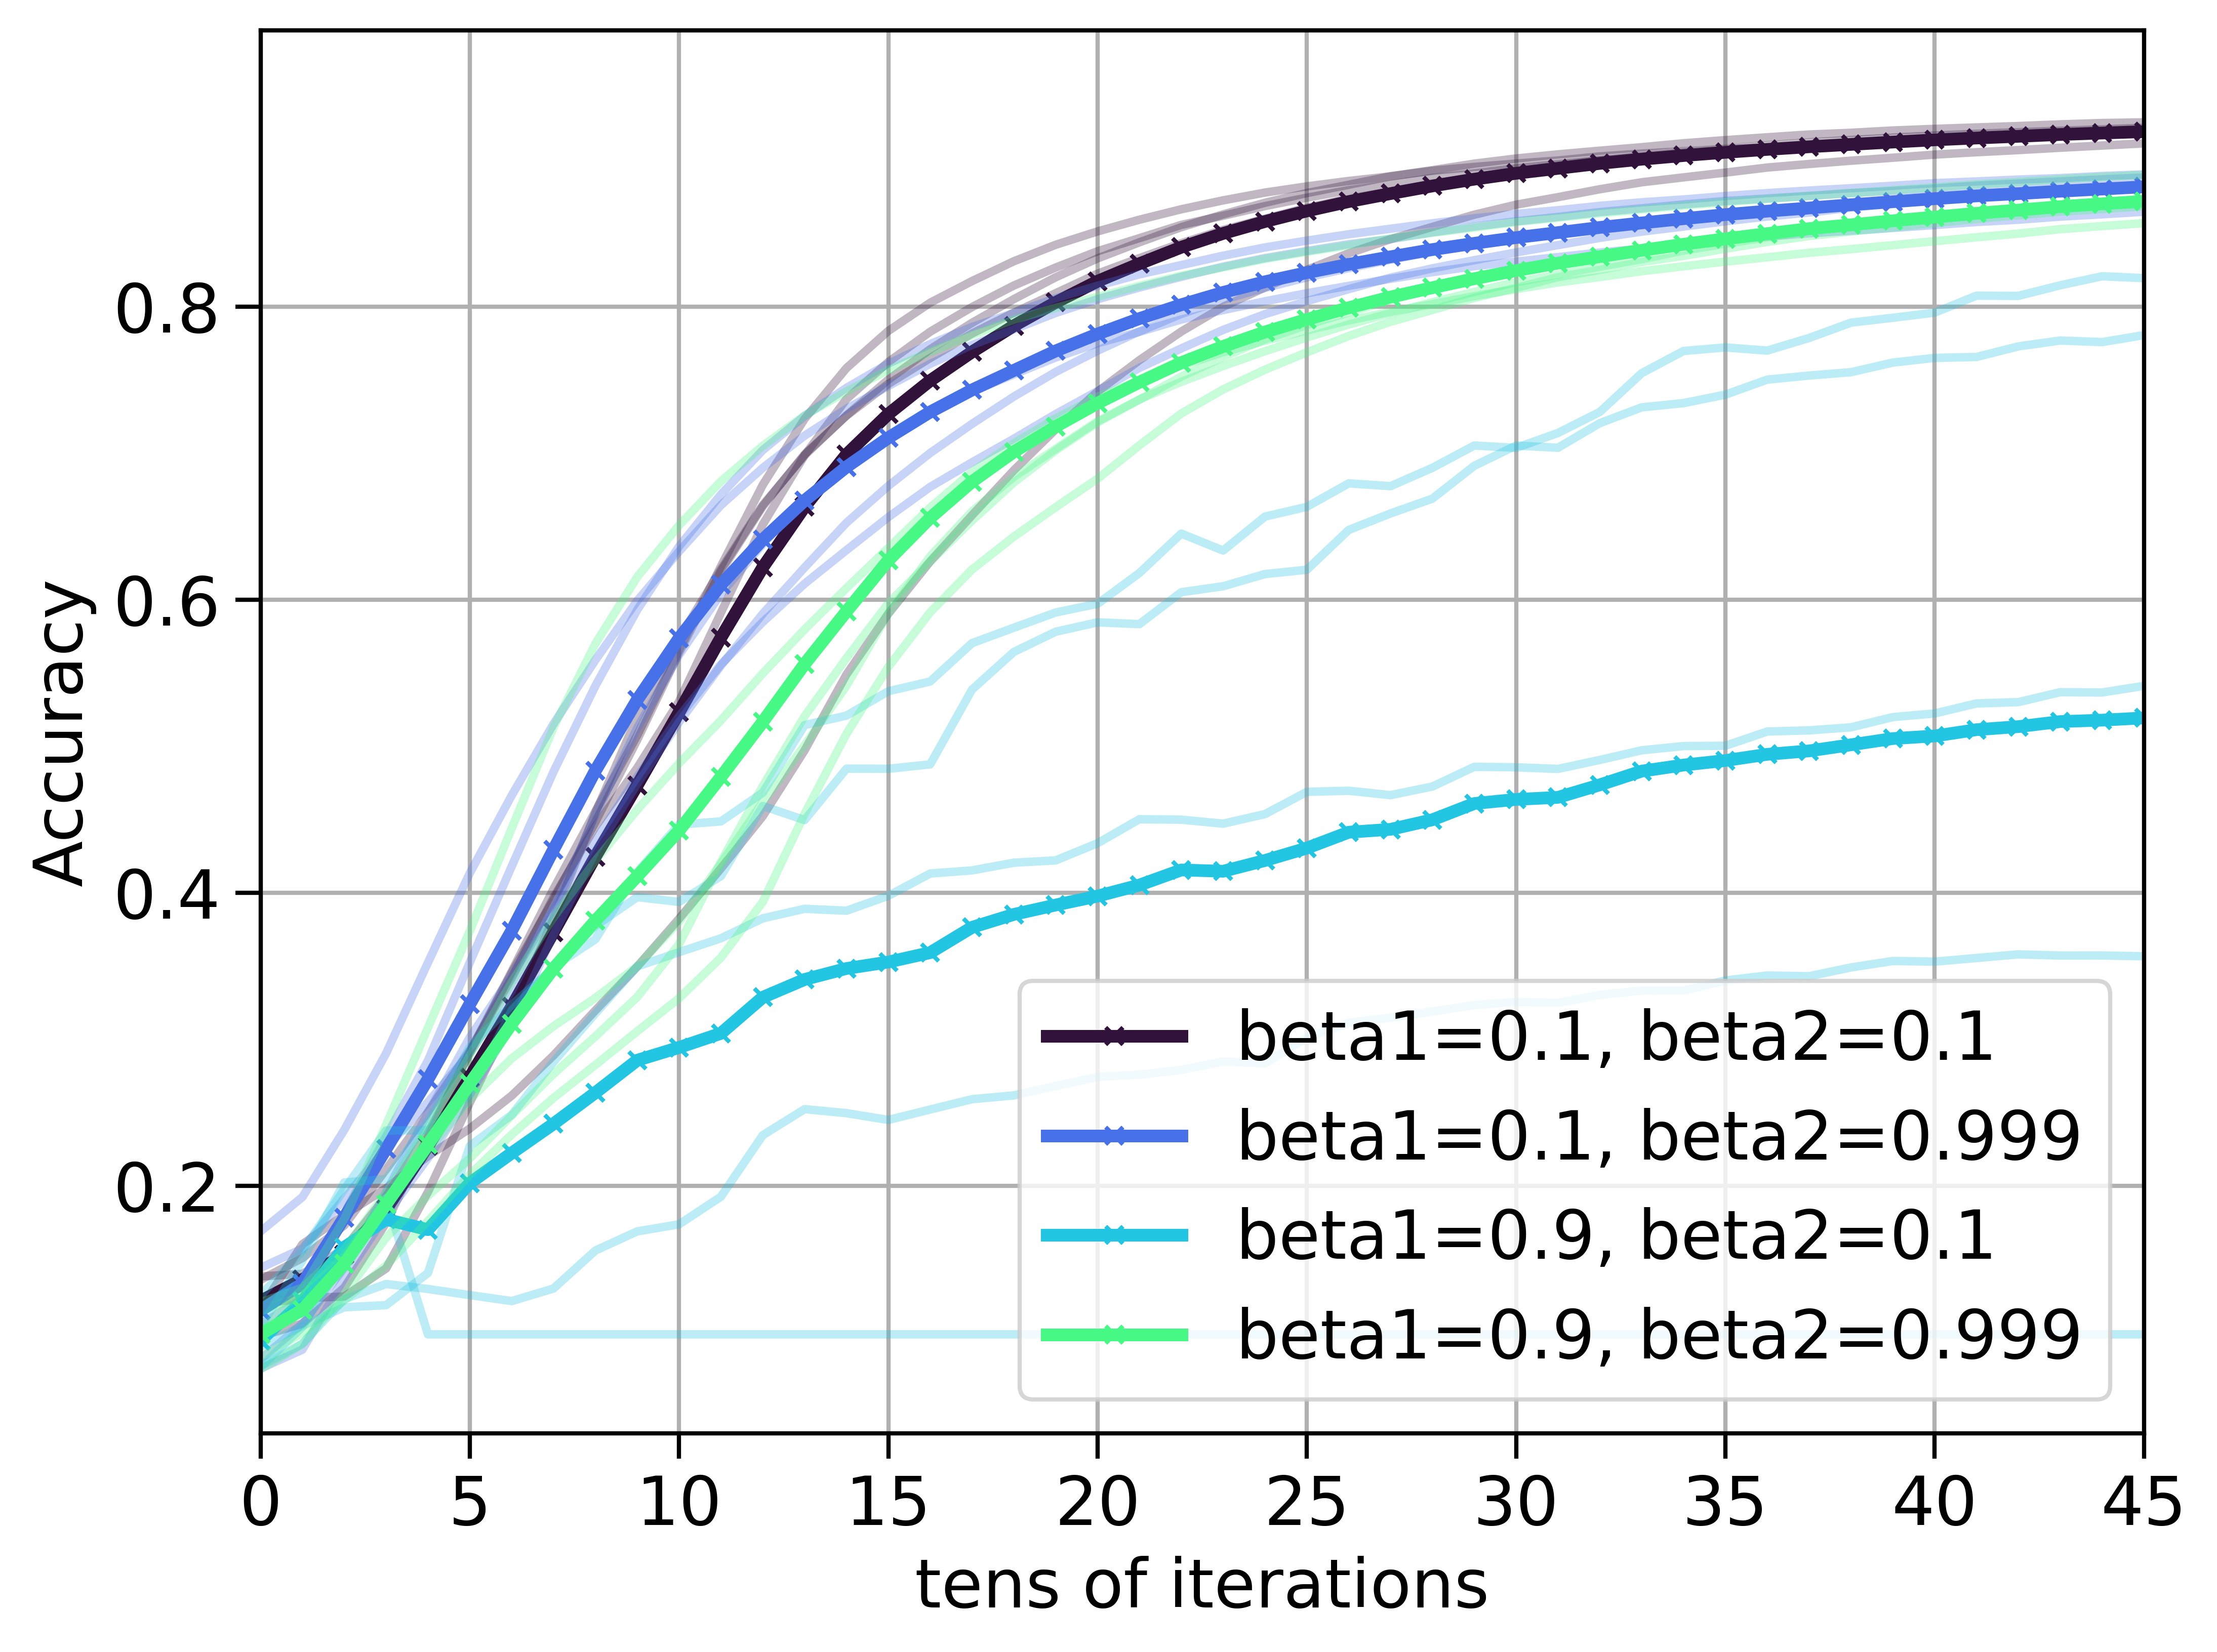

In [33]:
# Define beta1s and beta2s
beta1s = [0.1, 0.9]
beta2s = [0.1, 0.999]

# Generating colors
colors = plt.cm.turbo(np.linspace(0, 0.4, len(beta1s) * len(beta2s)))

# Plot
color_index = 0
for (beta1, beta2), data in results.items():
    accuracies = data['accuracies']
    num_iterations = len(accuracies[0])
    
    # Calculate average accuracies across folds for each iteration
    avg_accuracies = [np.mean([fold_acc[i] for fold_acc in accuracies]) for i in range(num_iterations)]

    # Plot each fold's accuracies (transparent lines)
    for fold_acc in accuracies:
        plt.plot(fold_acc, alpha=0.3, linestyle="-", color=colors[color_index])

    # Plot average accuracy (opaque line with thicker width)
    plt.plot(avg_accuracies, linewidth=3, linestyle="-", color=colors[color_index], label=f'beta1={beta1}, beta2={beta2}', marker="x", markersize=4)

    color_index += 1
    
plt.xlim(0, 45)
plt.xlabel('tens of iterations')
plt.ylabel('Accuracy')
# plt.title('Accuracy vs. Iterations for Different Beta Values (5-Fold CV)')
plt.legend()
plt.grid(True)
plt.show()
